In [1]:
# 분석에 사용할 데이터 패키지 등 다운로드
!wget https://raw.githubusercontent.com/initialsw/TextDataLecture/main/금통위의사록.tsv

!pip install nltk
!pip install konlpy
!pip install wordcloud

import nltk
nltk.download('punkt')

--2022-10-03 06:57:04--  https://raw.githubusercontent.com/initialsw/TextDataLecture/main/%EA%B8%88%ED%86%B5%EC%9C%84%EC%9D%98%EC%82%AC%EB%A1%9D.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15195720 (14M) [text/plain]
Saving to: ‘금통위의사록.tsv’

금통위의사록.tsv    100%[===================>]  14.49M  --.-KB/s    in 0.05s   

2022-10-03 06:57:04 (278 MB/s) - ‘금통위의사록.tsv’ saved [15195720/15195720]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 286 kB/s 
     |████████████████████████████████| 453 kB 46.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
# 한글 폰트 설치 (Wordcloud 한글깨짐 현상)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (31.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [3]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if "Nanum" in f]

['/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf']

## 5. 텍스트 분석 심화

### 5-1. Wordcloud를 사용한 시각화

In [4]:
# 필요한 패키지 로드
from wordcloud import WordCloud
from konlpy.tag import Kkma
from collections import Counter

import pandas as pd

In [5]:
data = pd.read_csv("금통위의사록.tsv", encoding="utf-8", sep="\t", parse_dates=["날짜"], index_col="날짜")

In [6]:
data.head()

,회차,의사록
날짜,,
2003-09-09,2003년도 제18차,金融通貨委員會 議事錄\n2003년도 제18차 회의\n1. 일 자 2003년 9월 9...
2003-10-09,2003년도 제20차,金融通貨委員會 議事錄\n2003년도 제20차 회의\n1. 일 자 2003년 10월 ...
2003-11-06,2003년도 제22차,金融通貨委員會 議事錄\n2003년도 제22차 회의\n1. 일 자 2003년 11월 ...
2003-12-11,2003년도 제25차,金融通貨委員會 議事錄\n2003년도 제25차 회의\n1. 일 자 2003년 12월 ...
2004-05-06,2004년도 제10차,金融通貨委員會 議事錄\n2004년도 제10차 회의\n1. 일 자 2004년 5월 6...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  if __name__ == '__main__':


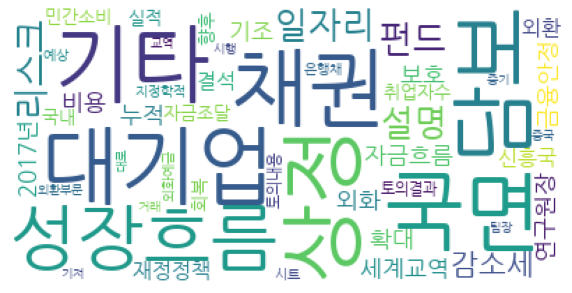

In [ ]:
import matplotlib.pyplot as plt

kkma = Kkma()

# 의사록이 나온 연도
YEAR = 2019

# 의사록을 분석하여 WordCloud로 시각화
sample = data.loc[str(YEAR) + "-01-01":str(YEAR+1) + "-01-01"]

# 토큰을 저장할 변수
tokens = []

# 의사록 본문에서 명사를 추출
for contents in sample["의사록"]:
  nouns = set(kkma.nouns(contents))
  # 단어가 두글자 이상인 경우만 추가
  for n in nouns:
    if len(n) > 1:
      tokens.append(n)

# 가장 많이 나온 단어 50개를 선택
counts = Counter(tokens)
tags = counts.most_common(50) 

# wordcloud 생성
wc = WordCloud(font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf",background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(cloud)
plt.show()

### 4.2. TF-IDF(Term Frequency-Inverse Document Frequency)

In [11]:
import pandas as pd

In [12]:
data = pd.read_csv("금통위의사록.tsv", encoding="utf-8", sep="\t", parse_dates=["날짜"], index_col="날짜")

In [13]:
# 금년 데이터만 사용
data = data.loc["2022-01-01":]
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  


,회차,의사록
날짜,,
2022-05-26,2022년도 제10차,2022년도 제10차\n금융통화위원회 의사록\n한 국 은 행\n1. 일 자\n202...
2022-07-13,2022년도 제13차,2022년도 제13차\n금융통화위원회 의사록\n한 국 은 행\n1. 일 자\n202...
2022-08-25,2022년도 제16차,2022년도 제16차\n금융통화위원회 의사록\n한 국 은 행\n1. 일 자\n202...
2022-01-14,2022년도 제1차,2022년도 제1차\n금융통화위원회 의사록\n한 국 은 행\n1. 일 자 2022년...
2022-02-24,2022년도 제4차,2022년도 제4차\n금융통화위원회 의사록\n한 국 은 행\n1. 일 자 2022년...


In [24]:
from konlpy.tag import Kkma
from nltk import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

kkma = Kkma()

# 의사록 본문
corpus = data["의사록"].tolist()

# 의사록을 문장단위로 분리한 후 명사만 추출하여 분석에 사용
corpus_edit = []
for doc in corpus:
  sentences = sent_tokenize(doc)
  for s in sentences:
    tmp_sent = kkma.nouns(s)
    str_tmp_sent = ""
    for n in tmp_sent:
      str_tmp_sent += n + " "
    corpus_edit.append(str_tmp_sent.strip())

# tf-idf 구하기
tfidfv = TfidfVectorizer().fit(corpus_edit)
tfidf_array = tfidfv.transform(corpus).toarray()

In [42]:
corpus_edit[20:23]

['전체적 성장 상 하방 리스크 혼재 상황',
 '동 위원 주요국 중 미국 성장률 예측 예측치가 치가 종전 하락 점 눈 언급',
 '금년 미국 소매 소매판매액 판매액 증가율 지속적 하락 대규모 축적 저축 가계 가계소득 소득 여건 펜트 펜트업 업 소비 지속 이유 무엇 관련 관련부서 부서 질의']

In [26]:
print(tfidfv.vocabulary_)

{'2022': 98, '2022년': 99, '10': 3, '10차': 15, '금융': 832, '금융통화위원회': 868, '통화': 3685, '위원회': 2597, '의사록': 2704, '5월': 207, '26': 117, '26일': 118, '회의실': 4034, '출석': 3594, '출석위원': 3595, '위원': 2595, '결석': 452, '결석위원': 453, '부총재': 1635, '부총재보': 1636, '외자': 2488, '외자운용원장': 2489, '운용': 2552, '원장': 2575, '조사': 3215, '조사국장': 3217, '국장': 744, '금융안정국장': 853, '안정': 2284, '통화정책국장': 3694, '정책': 3137, '국제': 745, '국제국장': 747, '경제': 495, '경제연구원장': 508, '연구원장': 2396, '공보관': 619, '금융통화위원회실장': 869, '실장': 2232, '시장': 2157, '시장총괄팀장': 2169, '총괄': 3544, '팀장': 3738, '의사': 2702, '의사팀장': 2705, '회의': 4032, '회의경과': 4033, '경과': 464, '의결': 2693, '의결안건': 2697, '안건': 2279, '의안': 2706, '제14호': 3170, '14': 32, '통화정책방향': 3697, '방향': 1489, '전일': 3071, '개최': 402, '동향': 1244, '동향보고회의': 1245, '보고': 1535, '34': 142, '34호': 145, '65378': 214, '경제전망': 511, '전망': 3040, '65379': 215, '35': 146, '35호': 147, '외환': 2506, '국제금융': 748, '금융시장국장': 851, '36': 148, '36호': 150, '금융시장': 850, '보고하': 1538, '본회의': 1585, '의장': 2708, '보고내용': 15

In [33]:
# 각 문서별 단어의 중요도(TF-IDF) 구하기
print("TF-IDF(금융통화위원회) :", tfidf_array[:, tfidfv.vocabulary_["금융통화위원회"]])

TF-IDF(금융통화위원회) : [0.01636868 0.01711162 0.01502903 0.01499875 0.01512425 0.0176329 ]


In [34]:
print("TF-IDF(한국은행) :", tfidf_array[:, tfidfv.vocabulary_["한국은행"]])

TF-IDF(한국은행) : [0.02942232 0.03075773 0.03376792 0.04717981 0.02718548 0.03169472]


In [35]:
print("TF-IDF(회의) :", tfidf_array[:, tfidfv.vocabulary_["회의"]])

TF-IDF(회의) : [0.         0.00673929 0.         0.         0.         0.        ]


In [36]:
print("TF-IDF(실장) :", tfidf_array[:, tfidfv.vocabulary_["실장"]])

TF-IDF(실장) : [0. 0. 0. 0. 0. 0.]


### 4.3. 주제모델링(Topic Modeling)

In [74]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
# 금통위 의사록 데이터 로드
data = pd.read_csv("금통위의사록.tsv", encoding="utf-8", sep="\t", parse_dates=["날짜"], index_col="날짜")
# 2020년 이후의 의사록 사용
data = data.loc["2020-01-01":]
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  after removing the cwd from sys.path.


,회차,의사록
날짜,,
2020-05-28,2020년도 제12차,2020년도 제12차\n금융통화위원회 의사록\n한 국 은 행\n1. 일 자 2020...
2020-07-16,2020년도 제15차,2020년도 제15차\n금융통화위원회 의사록\n한 국 은 행\n1. 일 자 2020...
2020-08-27,2020년도 제19차,2020년도 제19차\n금융통화위원회 의사록\n한 국 은 행\n1. 일 자 2020...
2020-01-17,2020년도 제1차,2020년도 제1차\n금융통화위원회 의사록\n한 국 은 행\n1. 일 자 2020년...
2020-10-14,2020년도 제22차,2020년도 제22차\n금융통화위원회 의사록\n한 국 은 행\n1. 일 자 2020...


In [78]:
from konlpy.tag import Kkma
from nltk import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import notebook

# 형태소 분석기 초기화
kkma = Kkma()

# 의사록 본문
corpus = data["의사록"].tolist()

# 의사록을 문장단위로 분리한 후 명사만 추출하여 분석에 사용
corpus_edit = []

for i in notebook.tqdm(range(len(corpus)), desc="의사록 분석"):
  sentences = sent_tokenize(corpus[i])
  for s in sentences:
    tmp_sent = kkma.nouns(s)    
    corpus_edit.append(tmp_sent)

의사록 분석:   0%|          | 0/23 [00:00<?, ?it/s]

In [88]:
for i in range(0, 5):
  print(corpus_edit[i])

['2020', '2020년', '년', '저', '12', '12차', '차', '금융', '금융통화위원회', '통화', '위원회', '의사록', '국', '은', '행', '1']
['일', '자', '2020', '2020년', '년', '5', '5월', '월', '28', '28일', '일', '2']
['장', '소', '금융', '금융통화위원회', '통화', '위원회', '회의실', '3']
['출석', '출석위원', '위원', '주', '열', '의', '장', '고', '승', '범', '위', '원', '윤', '면', '식', '임', '지', '조', '제', '영', '경', '상', '4']
['결석', '결석위원', '위원', '5']


In [84]:
# LDA를 사용한 주제분석
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

# 문장을 gensim LDA를 사용할 수 있는 형태로 변환
dictionary = Dictionary(corpus_edit)
corpus = [dictionary.doc2bow(text) for text in corpus_edit]

# 주제 수
NUM_TOPICS = 10

# LDA 실행
lda = LdaModel(corpus, num_topics=NUM_TOPICS, id2word=dictionary)

In [85]:
# 주제 출력하기
topics = lda.print_topics(num_words=10)
for topic in topics:
  print(topic)

(0, '0.041*"금리" + 0.039*"기준" + 0.036*"기준금리" + 0.027*"위원" + 0.017*"수준" + 0.016*"일부" + 0.016*"회의" + 0.014*"현" + 0.010*"관련" + 0.010*"유지"')
(1, '0.034*"월" + 0.021*"중" + 0.018*"증가" + 0.017*"은행" + 0.016*"2" + 0.015*"대출" + 0.015*"폭" + 0.014*"자금" + 0.013*"전월" + 0.012*"등"')
(2, '0.026*"정책" + 0.024*"통화" + 0.014*"방향" + 0.013*"관련" + 0.013*"통화정책방향" + 0.012*"위원" + 0.011*"금융" + 0.011*"통화정책" + 0.010*"부서" + 0.010*"관련부서"')
(3, '0.019*"소비" + 0.017*"등" + 0.016*"회복" + 0.015*"코로나" + 0.014*"경제" + 0.013*"고용" + 0.013*"확산" + 0.012*"코로나19" + 0.012*"19" + 0.012*"흐름"')
(4, '0.018*"물가" + 0.016*"등" + 0.015*"경제" + 0.013*"관련" + 0.012*"전망" + 0.011*"예상" + 0.010*"관련부서" + 0.010*"부서" + 0.009*"경기" + 0.009*"흐름"')
(5, '0.016*"필요" + 0.014*"정책" + 0.013*"가계" + 0.012*"통화" + 0.012*"위원" + 0.011*"수" + 0.011*"금융" + 0.011*"동" + 0.011*"통화정책" + 0.010*"대출"')
(6, '0.024*"등" + 0.023*"시장" + 0.017*"금융" + 0.016*"상승" + 0.016*"금리" + 0.013*"영향" + 0.012*"기대" + 0.012*"미" + 0.010*"금융시장" + 0.009*"하락"')
(7, '0.016*"위원" + 0.015*"관련" + 0.014*"우리" + 0.0

###4.4. 감성분석

#### - 영문 감성분석(VADER)

In [43]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

In [46]:
# Vader 감성분석기 초기화
sia = SentimentIntensityAnalyzer()

text_list = ["I really hate you.",
            "I don't like you.",
            "I am a student.",
            "I like you.",
            "I love you very much."]

for text in text_list:
  print("문장 :", text)
  print("감성분석 결과 :", sia.polarity_scores(text))
  print()

문장 : I really hate you.
감성분석 결과 : {'neg': 0.666, 'neu': 0.334, 'pos': 0.0, 'compound': -0.6115}

문장 : I don't like you.
감성분석 결과 : {'neg': 0.513, 'neu': 0.487, 'pos': 0.0, 'compound': -0.2755}

문장 : I am a student.
감성분석 결과 : {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

문장 : I like you.
감성분석 결과 : {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

문장 : I love you very much.
감성분석 결과 : {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}



### - 한글 감성분석 (eKoNLPy)
#### https://github.com/entelecheia/eKoNLPy 참고

In [94]:
!git clone https://github.com/entelecheia/eKoNLPy.git
%cd eKoNLPy/
!pip install .
%cd ..

fatal: destination path 'eKoNLPy' already exists and is not an empty directory.
/content/eKoNLPy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/eKoNLPy
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for eKoNLPy: filename=eKoNLPy-0.5.30-py3-none-any.whl size=14437153 sha256=662567df8ddac84c7e3915d5cedc7263781589add849bed9bce26097d2b5c20f
  Stored in directory: /tmp/pip-ephem-wheel-cache-enfu4w2n/wheels/1a/a6/81/1c9b823de4541d286e492e9e5b4fcd690762f4c2e446b6f185
Successfully built eKoNLPy
  Attempting uninstall: eKoNLPy
    Found existing installation: eKoNLP

In [98]:
from ekonlpy.sentiment import KSA

text = ["오늘은 날씨가 맑아서 기분이 너무나 좋다.",
        "물가가 너무 올라서 살기가 힘들다.",
        "매일 KOSPI 지수가 하락하고 있고, 환율은 매일 치솟고 있다."]

# 한국어 감성 분석기 초기화
ksa = KSA()

for t in text:
  tokens = ksa.tokenize(t)
  score = ksa.get_score(tokens)
  print(t)
  print(score)
  print()

오늘은 날씨가 맑아서 기분이 너무나 좋다.
{'Positive': 1, 'Negative': -6, 'Polarity': -0.7142856122449125, 'Subjectivity': 0.9999998571428775}

물가가 너무 올라서 살기가 힘들다.
{'Positive': 0, 'Negative': -4, 'Polarity': -0.9999997500000625, 'Subjectivity': 0.9999997500000625}

매일 KOSPI 지수가 하락하고 있고, 환율은 매일 치솟고 있다.
{'Positive': 1, 'Negative': -2, 'Polarity': -0.33333322222225925, 'Subjectivity': 0.9999996666667778}

